# Random Growth Examples
Examples of simple NeuroDevSim models that generate randomly branching neurons as explained in the Beginner's Tutorial in the **Documentation**:
- A single neuron simulation to demonstrate the *manage_front* method: [Random_model](#Simple_random_model).
- The same model simulated more slowly but in a reproducible way: [Reproducible_random_model](#Reproducible_random_model).
- A small network containing two large and two small randomly branching neurons, affecting each other's growth: [Small_network](#Small_network)

## Random_model
A single branching neuron with 5 dendrites.  
This example uses a number of built-in methods to generate random points along the heading of cylindrical fronts: *unit_heading_sample* for single fronts and *unit_branching_sample* for multiple fronts. The resulting neuron is different for each run.

<IPython.core.display.Javascript object>


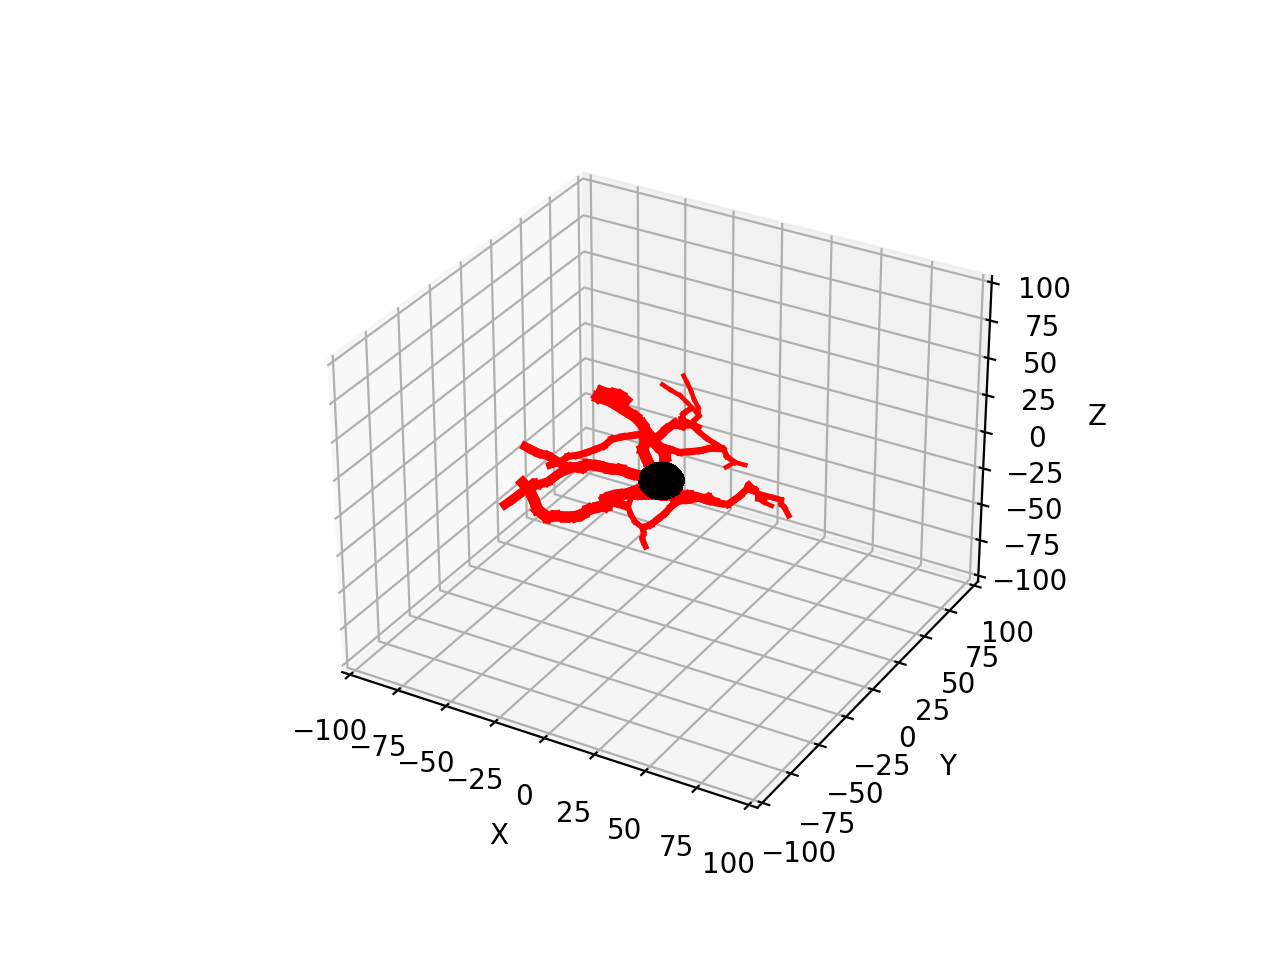

In [1]:
%matplotlib notebook 

from neurodevsim.simulator import *

class RandomFront(Front):
    
    def manage_front(self,constellation):
        if self.order == 0: # soma: make 5 dendrite roots
            points = self.unit_branching_sample(10) # generate more points than needed
            num_dend = 0 # count number of dendrites
            for p in points: # make 5 dendrites
                new_pos = self.orig + p * 15. # compute position of dendrite end
                # check for possible collisions
                try:
                    new_front = self.add_child(constellation,new_pos,radius=2.) # make a new front and store it
                    num_dend += 1
                    if num_dend == 5: # enough dendrites made
                        # make soma inactive: stops growing -> will not call this method again
                        self.disable(constellation)
                        return # completed this call
                except (CollisionError, GridCompetitionError, InsideParentError, VolumeError):
                    continue # pick another new_pos, no attempt to correct the error
            print ("Warning: less than 5 dendrites made for",self.get_neuron_name(constellation),num_dend)
            # make soma inactive: stops growing -> will not call this method again
            self.disable(constellation)
            
        elif self.path_length < 100: # continue growth of a dendrite or branch it
            if np.random.random() > 0.06: # most probable: extend with a single front
                count = 0 # counts number of add_child trials
                while count < 100:
                    extension = self.unit_heading_sample(width=20.)
                    new_pos = self.end + extension * 5. # compute position of child end
                    # check for possible collisions
                    try:
                        new_front = self.add_child(constellation,new_pos) # make a new front and store it
                        # make front inactive: stops growing -> will not call this method again
                        self.disable(constellation)
                        return # completed this call
                    except (CollisionError, GridCompetitionError, InsideParentError, VolumeError):
                        count += 1
                        continue # pick another new_pos, no attempt to correct the error
                print ("Warning: failed extension for dendrite of",self.get_neuron_name(constellation))
                if (constellation.cycle - self.birth) > 2: # this was second failed attempt:
                   self.disable(constellation) # stop trying
            else: # branch with low probability
                points = self.unit_branching_sample(5) # generate more points than needed
                rad = self.taper(0.8) # decrease radius
                num_dend = 0 # count number of dendrite branches
                for p in points: # make 2 branches
                    new_pos = self.end + p * 5.  # compute position of child end
                    # check for possible collisions
                    try:
                        new_front = self.add_child(constellation,new_pos,radius=rad) # make a new front and store it
                        num_dend += 1
                        if num_dend == 2: # enough dendrites made
                            # make front inactive: stops growing -> will not call this method again
                            self.disable(constellation)
                            return # completed this call
                    except (CollisionError, GridCompetitionError, InsideParentError, VolumeError):
                        continue # pick another new_pos, no attempt to correct the error
                print ("Warning: failed branching for",self.get_neuron_name(constellation),self.num_children)
                if self.num_children > 0: # single child made -> make front inactive
                    self.disable(constellation)
        else: # reached maximum length -> terminate growth
            self.disable(constellation)

if __name__ == '__main__':

    # initialize Admin_agent
    fname = "output/random.db"
    sim_volume = [[-100., -100., -100.], [100.0,100.0,100.0]]
    neuron_types = [RandomFront]
    admin = Admin_agent(4,fname,sim_volume,neuron_types,verbose=0,plot=True)

    # make soma and set neuron name
    admin.add_neurons(RandomFront,"rand_neuron",1,[[-30,-30,-30],[30,30,30]],10.)
    # run the simulation
    admin.simulation_loop(25)

    # clean up
    admin.destruction()

## Reproducible_random_model
Same model running on a single core and with a *seed* provided always produces the same results but runs more slowly.

<IPython.core.display.Javascript object>


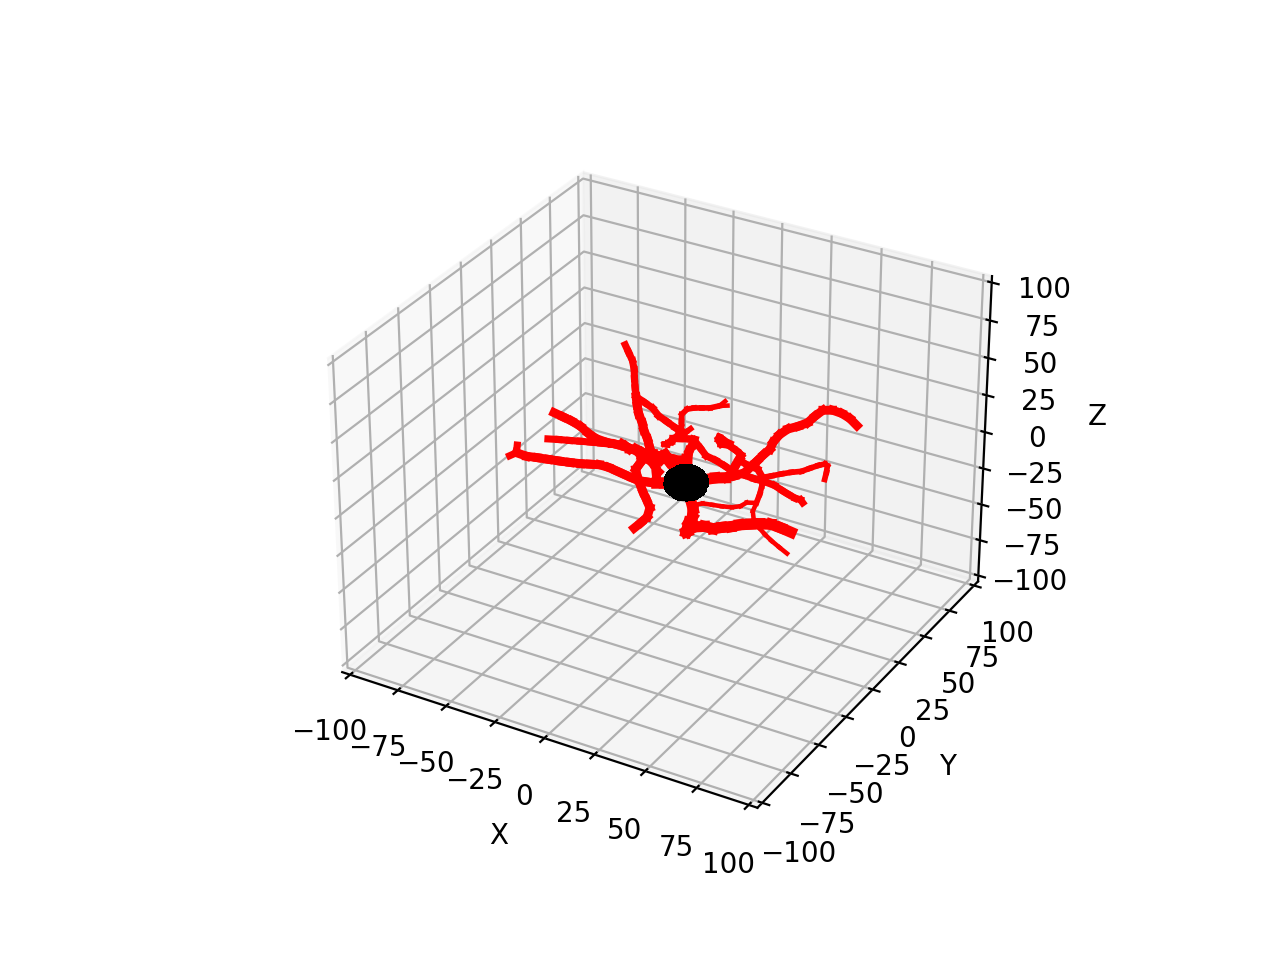

In [3]:
%matplotlib notebook 

from neurodevsim.simulator import *

class RandomFront(Front):
    
    def manage_front(self,constellation):
        if self.order == 0: # soma: make 5 dendrite roots
            points = self.unit_branching_sample(10) # generate more points than needed
            num_dend = 0 # count number of dendrites
            for p in points: # make 5 dendrites
                new_pos = self.orig + p * 15. # compute position of dendrite end
                # check for possible collisions
                try:
                    new_front = self.add_child(constellation,new_pos,radius=2.) # make a new front and store it
                    num_dend += 1
                    if num_dend == 5: # enough dendrites made
                        # make soma inactive: stops growing -> will not call this method again
                        self.disable(constellation)
                        return # completed this call
                except (CollisionError, GridCompetitionError, InsideParentError, VolumeError):
                    continue # pick another new_pos, no attempt to correct the error
            print ("Warning: less than 5 dendrites made for",self.get_neuron_name(constellation),num_dend)
            # make soma inactive: stops growing -> will not call this method again
            self.disable(constellation)
            
        elif self.path_length < 100: # continue growth of a dendrite or branch it
            if np.random.random() > 0.06: # most probable: extend with a single front
                count = 0 # counts number of add_child trials
                while count < 100:
                    extension = self.unit_heading_sample(width=20)
                    new_pos = self.end + extension * 5. # compute position of child end
                    # check for possible collisions
                    try:
                        new_front = self.add_child(constellation,new_pos) # make a new front and store it
                        # make front inactive: stops growing -> will not call this method again
                        self.disable(constellation)
                        return # completed this call
                    except (CollisionError, GridCompetitionError, InsideParentError, VolumeError):
                        count += 1
                        continue # pick another new_pos, no attempt to correct the error
                print ("Warning: failed extension for dendrite of",self.get_neuron_name(constellation))
                if (constellation.cycle - self.birth) > 2: # this was second failed attempt:
                    self.disable(constellation) # stop trying
            else: # branch with low probability
                points = self.unit_branching_sample(5) # generate more points than needed
                rad = self.taper(0.8) # decrease radius
                num_dend = 0 # count number of dendrite branches
                for p in points: # make 2 branches
                    new_pos = self.end + p * 5.  # compute position of child end
                    # check for possible collisions
                    try:
                        new_front = self.add_child(constellation,new_pos,radius=rad) # make a new front and store it
                        num_dend += 1
                        if num_dend == 2: # enough dendrites made
                            # make front inactive: stops growing -> will not call this method again
                            self.disable(constellation)
                            return # completed this call
                    except (CollisionError, GridCompetitionError, InsideParentError, VolumeError):
                        continue # pick another new_pos, no attempt to correct the error
                print ("Warning: failed branching for",self.get_neuron_name(constellation),self.num_children)
                if self.num_children > 0: # single child made -> make front inactive
                    self.disable(constellation)
        else: # reached maximum length -> terminate growth
            self.disable(constellation)

if __name__ == '__main__':

    # initialize Admin_agent
    fname = "output/rep_random.db"
    sim_volume = [[-100., -100., -100.], [100.0,100.0,100.0]]
    neuron_types = [RandomFront]
    admin = Admin_agent(1,fname,sim_volume,neuron_types,verbose=0,seed=3,plot=True)

    # make soma and set neuron name
    admin.add_neurons(RandomFront,"rand_neuron",1,[[-30,-30,-30],[30,30,30]],10.)
    # run the simulation
    admin.simulation_loop(25)

    # clean up
    admin.destruction()

## Small_network
Based on the [Random_model](#Random_model) large and small types of random neurons are defined and mixed in a growing network containing two of each. Run this repeatedly to observe how dealing with collisions can steer growth in a crowded environment. Note that the default viewpoint of the plot was changed with the *azim*=-45 setting.

<IPython.core.display.Javascript object>


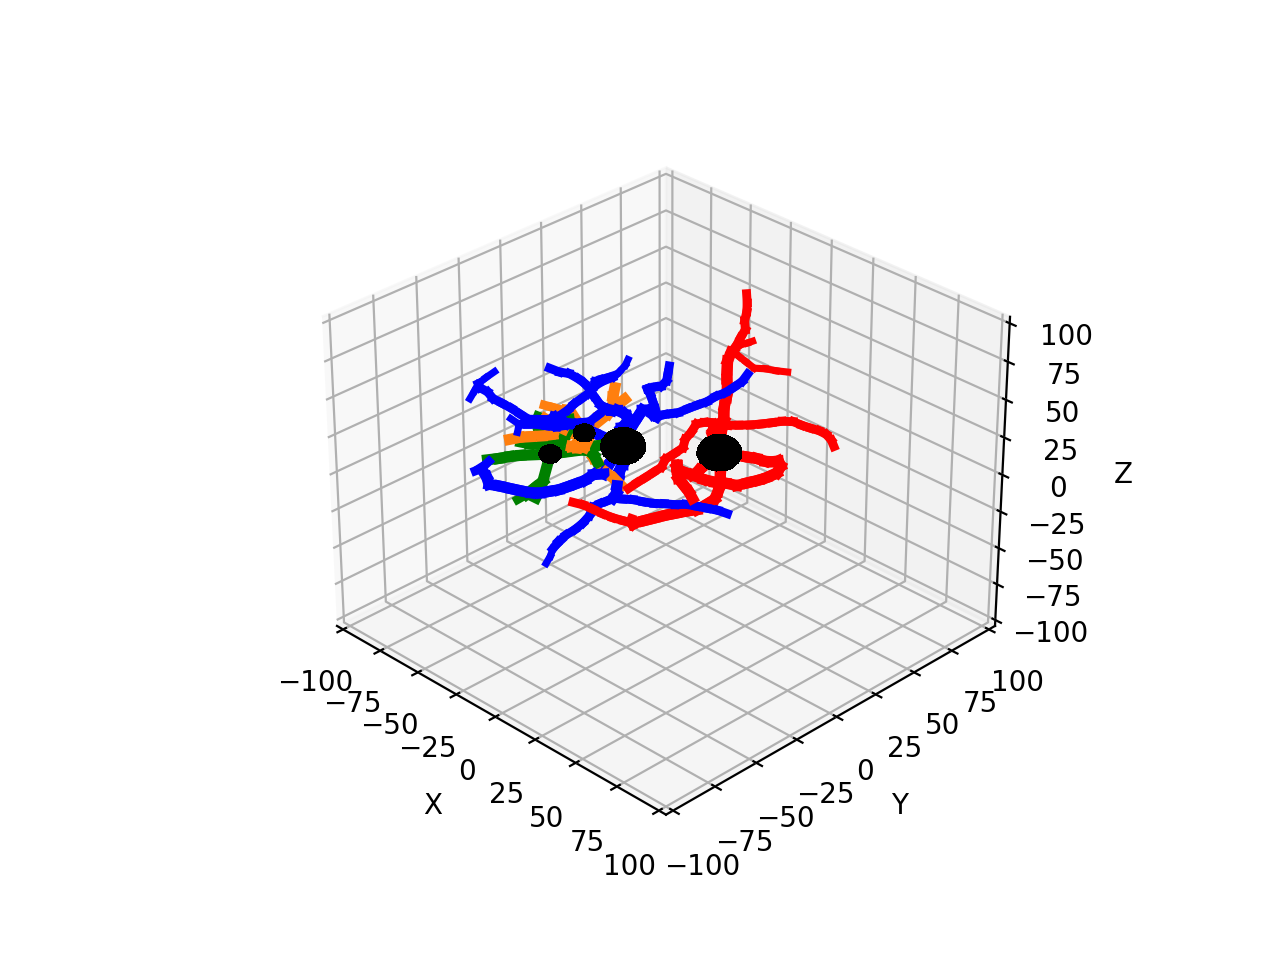

In [4]:
%matplotlib notebook 

from neurodevsim.simulator import *
import numpy as np

class BRandomFront(Front): # the large one
    
    def manage_front(self,constellation):
        if self.order == 0: # soma: make 5 dendrite roots
            points = self.unit_branching_sample(10) # generate more points than needed
            num_dend = 0 # count number of dendrites
            for p in points: # make 5 dendrites
                new_pos = self.orig + p * 15. # compute position of dendrite end
                # check for possible collisions
                try:
                    new_front = self.add_child(constellation,new_pos,radius=2.) # make a new front and store it
                    num_dend += 1
                    if num_dend == 5: # enough dendrites made
                        # make soma inactive: stops growing -> will not call this method again
                        self.disable(constellation)
                        return # completed this call
                except (CollisionError, GridCompetitionError, InsideParentError, VolumeError):
                    continue # pick another new_pos, no attempt to correct the error
            # make soma inactive: stops growing -> will not call this method again
            self.disable(constellation)
            
        elif self.path_length < 100: # continue growth of a dendrite or branch it
            if np.random.random() > 0.06: # most probable: extend with a single front
                count = 0 # counts number of add_child trials
                while count < 100:
                    extension = self.unit_heading_sample(width=20)
                    new_pos = self.end + extension * 5. # compute position of child end
                    # check for possible collisions
                    try:
                        new_front = self.add_child(constellation,new_pos) # make a new front and store it
                        # make front inactive: stops growing -> will not call this method again
                        self.disable(constellation)
                        return # done for this cycle
                    except (CollisionError, GridCompetitionError, InsideParentError, VolumeError):
                        count += 1
                        continue # pick another new_pos, no attempt to correct the error
                if (constellation.cycle - self.birth) > 2: # this was second failed attempt:
                    self.disable(constellation) # stop trying
            else: # branch with low probability
                points = self.unit_branching_sample(5) # generate more points than needed
                rad = self.taper(0.8) # decrease radius
                num_dend = 0 # count number of dendrite branches
                for p in points: # make 2 branches
                    new_pos = self.end + p * 5.  # compute position of child end
                    # check for possible collisions
                    try:
                        new_front = self.add_child(constellation,new_pos,radius=rad) # make a new front and store it
                        num_dend += 1
                        if num_dend == 2: # enough dendrites made
                            # make front inactive: stops growing -> will not call this method again
                            self.disable(constellation)
                            return # done for this cycle
                    except (CollisionError, GridCompetitionError, InsideParentError, VolumeError):
                        continue # pick another new_pos, no attempt to correct the error
                if self.num_children > 0: # single child made -> make front inactive
                    self.disable(constellation)
        else: # reached maximum length -> terminate growth
            self.disable(constellation)

class SRandomFront(Front): # the small one: more dendrites of smaller length
    
    def manage_front(self,constellation):
        if self.order == 0: # soma: make many dendrite roots
            points = self.unit_branching_sample(18) # generate more points than needed
            goal_dend = 5 + int(8 * np.random.random()) # random number of dendrites
            num_dend = 0 # count number of dendrites
            for p in points: # make 5 dendrites
                new_pos = self.orig + p * 15. # compute position of dendrite end
                # check for possible collisions
                try:
                    new_front = self.add_child(constellation,new_pos,radius=2.) # make a new front and store it
                    num_dend += 1
                    if num_dend == goal_dend: # enough dendrites made
                        # make soma inactive: stops growing -> will not call this method again
                        self.disable(constellation)
                        return # completed this call
                except (CollisionError, GridCompetitionError, InsideParentError, VolumeError):
                    continue # pick another new_pos, no attempt to correct the error
            # make soma inactive: stops growing -> will not call this method again
            self.disable(constellation)
            
        elif self.path_length < 30: # continue growth of a dendrite or branch it
            if np.random.random() > 0.06: # most probable: extend with a single front
                count = 0 # counts number of add_child trials
                while count < 100:
                    extension = self.unit_heading_sample(width=25)
                    new_pos = self.end + extension * 5. # compute position of child end
                    # check for possible collisions
                    try:
                        new_front = self.add_child(constellation,new_pos) # make a new front and store it
                        # make front inactive: stops growing -> will not call this method again
                        self.disable(constellation)
                        return # done for this cycle
                    except (CollisionError, GridCompetitionError, InsideParentError, VolumeError):
                        count += 1
                        continue # pick another new_pos, no attempt to correct the error
                if (constellation.cycle - self.birth) > 2: # this was second failed attempt:
                    self.disable(constellation) # stop trying
            else: # branch with low probability
                points = self.unit_branching_sample(5) # generate more points than needed
                rad = self.taper(0.8) # decrease radius
                num_dend = 0 # count number of dendrite branches
                for p in points: # make 2 branches
                    new_pos = self.end + p * 5.  # compute position of child end
                    # check for possible collisions
                    try:
                        new_front = self.add_child(constellation,new_pos,radius=rad) # make a new front and store it
                        num_dend += 1
                        if num_dend == 2: # enough dendrites made
                            # make front inactive: stops growing -> will not call this method again
                            self.disable(constellation)
                            return # done for this cycle
                    except (CollisionError, GridCompetitionError, InsideParentError, VolumeError):
                        continue # pick another new_pos, no attempt to correct the error
                if self.num_children > 0: # single child made -> make front inactive
                    self.disable(constellation)
        else: # reached maximum length -> terminate growth
            self.disable(constellation)
        
if __name__ == '__main__':

    # initialize Admin_agent
    fname = "output/random_net.db"
    sim_volume = [[-100., -100., -100.], [100.0,100.0,100.0]]
    neuron_types = [BRandomFront,SRandomFront]
    admin = Admin_agent(4,fname,sim_volume,neuron_types,verbose=0,plot=True,azim=-45)

    # make somata and set neuron name for large neurons
    admin.add_neurons(BRandomFront,"brand_neuron",2,[[-30,-30,-30],[30,30,30]],10.)
    # make somata and set neuron name for small neurons
    admin.add_neurons(SRandomFront,"srand_neuron",2,[[-60,-60,-60],[60,60,60]],5.)

    # run the simulation
    admin.simulation_loop(30)

    # clean up
    admin.destruction()